In [4]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

In [5]:
N = 20
t_max = 1000
t_step = 50000
tlist = np.linspace(0, t_max, t_step)

DELTA = 1
K = 1
P = 10 * DELTA

a = qt.destroy(N)
a_dag = a.dag()


H1 = -((a**2) + (a_dag**2)) / 2
H0 = DELTA * a_dag * a + K * (a_dag**2) * (a**2)
psi0 = qt.coherent(N, 0)

def p(t, args=None):
    '''Linear graph'''
    return P * t / t_max


In [7]:
result = qt.mesolve([H0, [H1, p]], psi0, tlist, [], [])

xvec = np.linspace(-5 ,5 , 500)
W_start = qt.wigner(result.states[0], xvec, xvec)
W_mid = qt.wigner(result.states[len(result.states)//2], xvec, xvec)
W_final = qt.wigner(result.states[-1], xvec, xvec)

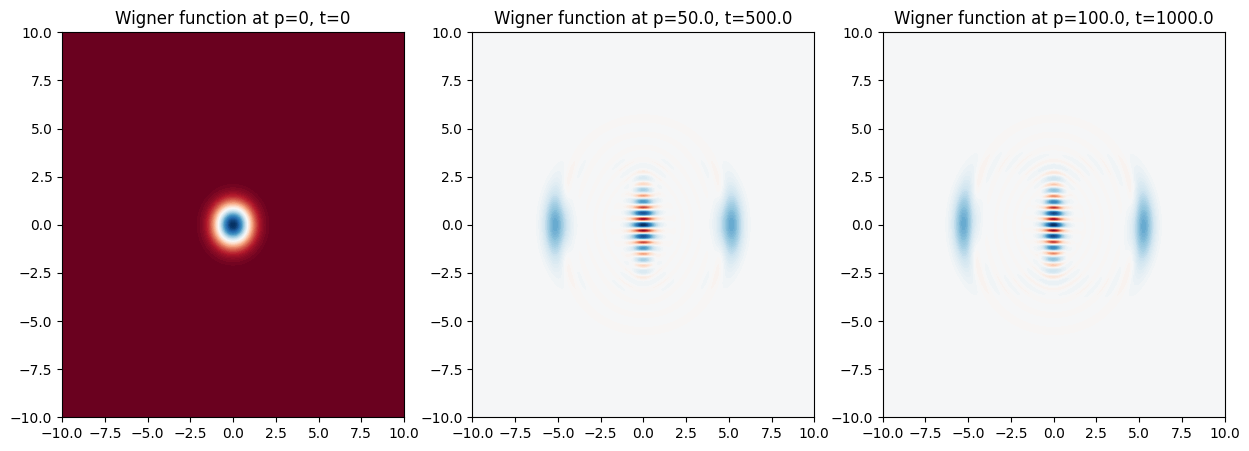

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].contourf(xvec, xvec, W_start, 100, cmap='RdBu')
axes[0].set_title("Wigner function at p=0, t=0")

axes[1].contourf(xvec, xvec, W_mid, 100, cmap='RdBu')
axes[1].set_title(f"Wigner function at p={p(tlist[len(tlist)//2]):.1f}, t={tlist[len(tlist)//2]:.1f}")

axes[2].contourf(xvec, xvec, W_final, 100, cmap='RdBu')
axes[2].set_title(f"Wigner function at p={p(tlist[-1]):.1f}, t={tlist[-1]:.1f}")

plt.show()